# Regression - Linear, Ridge, Lasso(3)

# Tasks
Use the dataset to discuss the relationship between the variables for the life expectancy using

1) Linear Regression

2) Ridge Regression

3) Lasso Regression

4) Regression using Decision Tree and RandomForest

(Online availability of dataset: https://www.kaggle.com/kumarajarshi/life-expectancy-who/)

In [1]:
# Load the libraries
import numpy as np 
import pandas as pd 
import seaborn as sns
import re
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
from warnings import filterwarnings
filterwarnings('ignore')

from scipy.stats.mstats import winsorize
import scipy.stats as stats
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import (GridSearchCV, cross_val_score, cross_val_predict, StratifiedKFold, learning_curve)

from statsmodels.tools.eval_measures import mse, rmse
from sklearn import preprocessing

## Analyzing DataSet

In [2]:
df = pd.read_csv('Life Expectancy Data.csv')
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [3]:
df.shape

(2938, 22)

In [4]:
df.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

In [5]:
df.info() # Only Country and Status are categorical variables.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

## EDA

In [6]:
#Fixing column names
df.rename(columns = {" BMI " :"BMI", 
                                  "Life expectancy ": "Life_expectancy",
                                  "Adult Mortality":"Adult_mortality",
                                  "infant deaths":"Infant_deaths",
                                  "percentage expenditure":"Percentage_expenditure",
                                  "Hepatitis B":"HepatitisB",
                                  "Measles ":"Measles",
                                  "under-five deaths ": "Under_five_deaths",
                                  "Total expenditure":"Total_expenditure",
                                  "Diphtheria ": "Diphtheria",
                                  " thinness  1-19 years":"Thinness_1-19_years",
                                  " thinness 5-9 years":"Thinness_5-9_years",
                                  " HIV/AIDS":"HIV/AIDS",
                                  "Income composition of resources":"Income_composition_of_resources"}, inplace = True)

In [7]:
df.nunique(axis = 0)

Country                             193
Year                                 16
Status                                2
Life_expectancy                     362
Adult_mortality                     425
Infant_deaths                       209
Alcohol                            1076
Percentage_expenditure             2328
HepatitisB                           87
Measles                             958
BMI                                 608
Under_five_deaths                   252
Polio                                73
Total_expenditure                   818
Diphtheria                           81
HIV/AIDS                            200
GDP                                2490
Population                         2278
Thinness_1-19_years                 200
Thinness_5-9_years                  207
Income_composition_of_resources     625
Schooling                           173
dtype: int64

## Correlation between Features

In [8]:
correlation = df.corr()
print(correlation)

                                     Year  Life_expectancy  Adult_mortality  \
Year                             1.000000         0.170033        -0.079052   
Life_expectancy                  0.170033         1.000000        -0.696359   
Adult_mortality                 -0.079052        -0.696359         1.000000   
Infant_deaths                   -0.037415        -0.196557         0.078756   
Alcohol                         -0.052990         0.404877        -0.195848   
Percentage_expenditure           0.031400         0.381864        -0.242860   
HepatitisB                       0.104333         0.256762        -0.162476   
Measles                         -0.082493        -0.157586         0.031176   
BMI                              0.108974         0.567694        -0.387017   
Under_five_deaths               -0.042937        -0.222529         0.094146   
Polio                            0.094158         0.465556        -0.274823   
Total_expenditure                0.090740         0.

<AxesSubplot:>

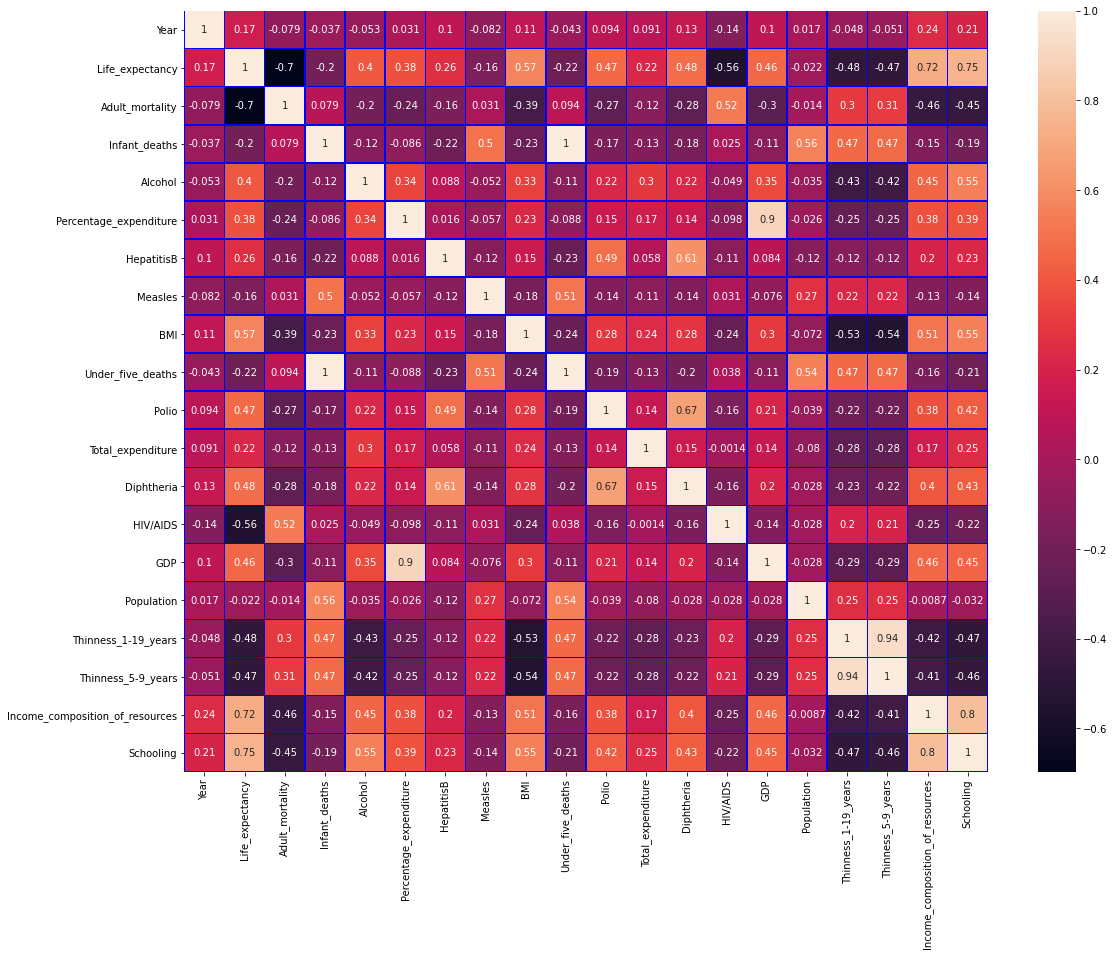

In [9]:
plt.figure(figsize=(18,14))
sns.heatmap(correlation,annot=True,linecolor="blue",lw=0.5)

## Looking for the Missing Values

In [10]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_1-19_years                 34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

In [11]:
df.isnull().values.any()

True

In [12]:
df.dropna(inplace=True) # There were still missing data fields, that's why null rows are dropped.

In [13]:
df.isnull().values.any()

False

## Outliers

In [14]:
col_dict = {'Life_expectancy':1 , 'Adult_mortality':2 ,
        'Alcohol':3 , 'Percentage_expenditure': 4, 'HepatitisB': 5,
       'Measles' : 6, 'BMI': 7, 'Under_five_deaths' : 8, 'Polio' : 9, 'Total_expenditure' :10,
       'Diphtheria':11, 'HIV/AIDS':12, 'GDP':13, 'Population' :14,
       'Thinness_1-19_years' :15, 'Thinness_5-9_years' :16,
       'Income_composition_of_resources' : 17, 'Schooling' :18, 'Infant_deaths':19}

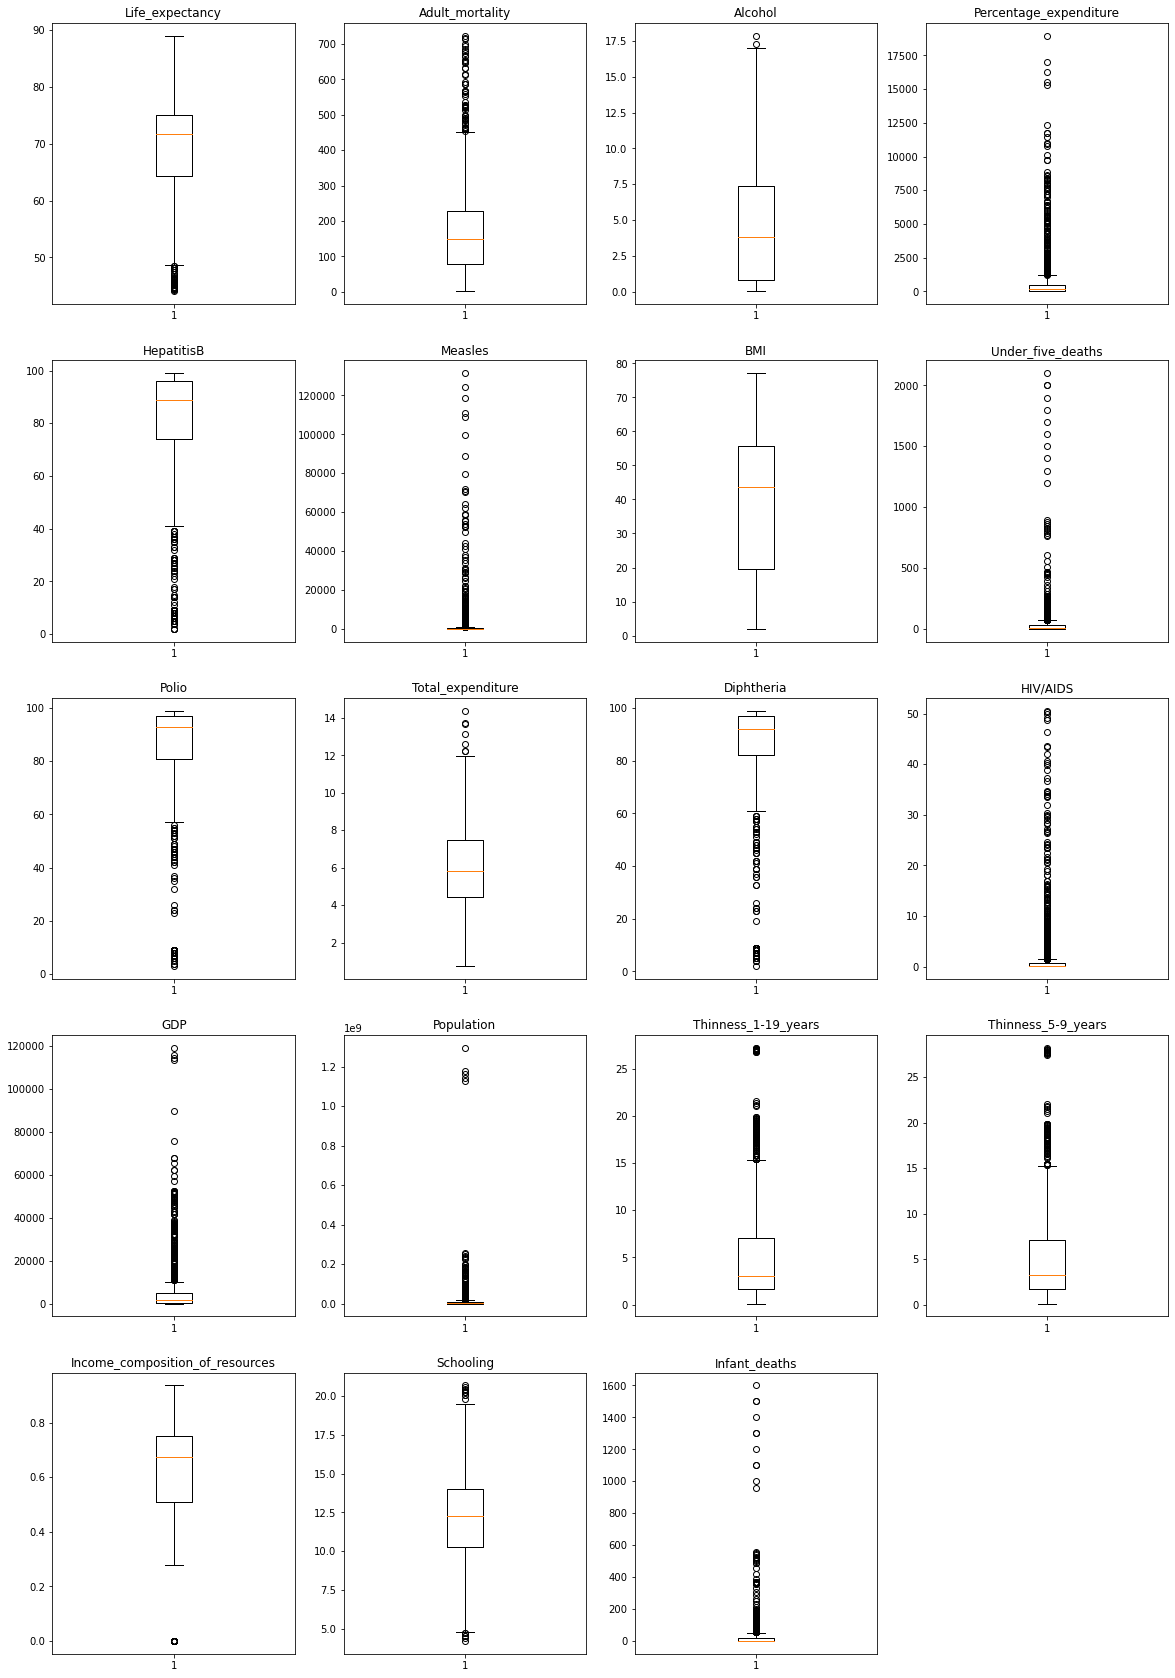

In [15]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(df[variable],whis=1.5)
                     plt.title(variable)

plt.show()

## Applying Winzorization for Outliers

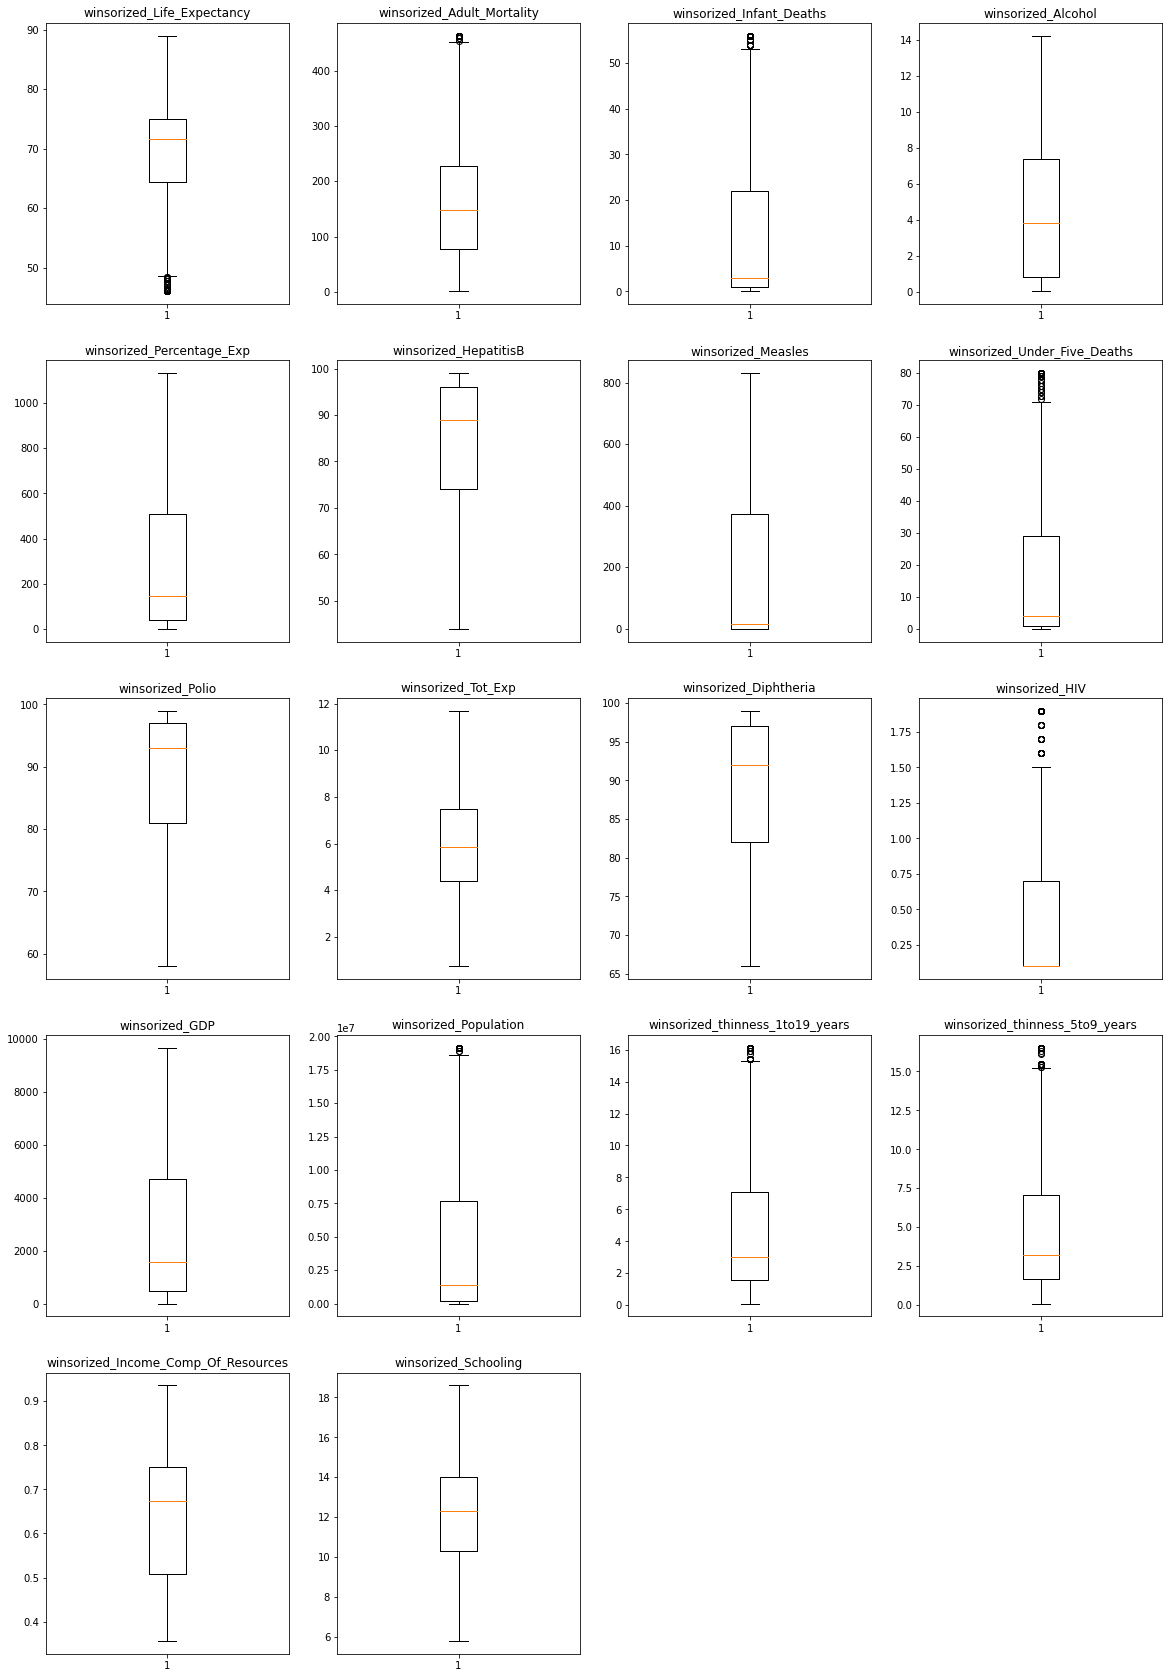

In [16]:
plt.figure(figsize=(20,30))

plt.subplot(5,4,1)
winsorized_Life_Expectancy = winsorize(df['Life_expectancy'],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("winsorized_Life_Expectancy")

plt.subplot(5,4,2)
winsorized_Adult_Mortality = winsorize(df['Adult_mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("winsorized_Adult_Mortality")

plt.subplot(5,4,3)
winsorized_Infant_Deaths = winsorize(df['Infant_deaths'],(0,0.11))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("winsorized_Infant_Deaths")

plt.subplot(5,4,4)
winsorized_Alcohol = winsorize(df['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("winsorized_Alcohol")

plt.subplot(5,4,5)
winsorized_Percentage_Exp = winsorize(df['Percentage_expenditure'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("winsorized_Percentage_Exp")

plt.subplot(5,4,6)
winsorized_HepatitisB = winsorize(df['HepatitisB'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("winsorized_HepatitisB")

plt.subplot(5,4,7)
winsorized_Measles = winsorize(df['Measles'],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("winsorized_Measles")

plt.subplot(5,4,8)
winsorized_Under_Five_Deaths = winsorize(df['Under_five_deaths'],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("winsorized_Under_Five_Deaths")

plt.subplot(5,4,9)
winsorized_Polio = winsorize(df['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("winsorized_Polio")

plt.subplot(5,4,10)
winsorized_Tot_Exp = winsorize(df['Total_expenditure'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized_Tot_Exp")

plt.subplot(5,4,11)
winsorized_Diphtheria = winsorize(df['Diphtheria'],(0.11,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized_Diphtheria")

plt.subplot(5,4,12)
winsorized_HIV = winsorize(df['HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("winsorized_HIV")

plt.subplot(5,4,13)
winsorized_GDP = winsorize(df['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("winsorized_GDP")

plt.subplot(5,4,14)
winsorized_Population = winsorize(df['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized_Population")

plt.subplot(5,4,15)
winsorized_thinness_1to19_years = winsorize(df['Thinness_1-19_years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized_thinness_1to19_years")

plt.subplot(5,4,16)
winsorized_thinness_5to9_years = winsorize(df['Thinness_5-9_years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized_thinness_5to9_years")

plt.subplot(5,4,17)
winsorized_Income_Comp_Of_Resources = winsorize(df['Income_composition_of_resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized_Income_Comp_Of_Resources")

plt.subplot(5,4,18)
winsorized_Schooling = winsorize(df['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized_Schooling")

plt.show()

In [17]:
# Store the updated values of the columns into already existed dataframe
df['Life_expectancy'] = winsorized_Life_Expectancy
df['Adult_mortality'] = winsorized_Adult_Mortality
df['Infant_deaths'] = winsorized_Infant_Deaths
df['Alcohol'] = winsorized_Alcohol
df['Percentage_expenditure'] = winsorized_Percentage_Exp
df['HepatitisB'] = winsorized_HepatitisB
df['Under_five_deaths'] = winsorized_Under_Five_Deaths
df['Polio'] = winsorized_Polio
df['Total_expenditure'] = winsorized_Tot_Exp
df['Diphtheria'] = winsorized_Diphtheria
df['HIV/AIDS'] = winsorized_HIV
df['GDP'] = winsorized_GDP
df['Population'] = winsorized_Population
df['Thinness_1-19_years'] = winsorized_thinness_1to19_years
df['Thinness_5-9_years'] = winsorized_thinness_5to9_years
df['Income_composition_of_resources'] = winsorized_Income_Comp_Of_Resources
df['Schooling'] = winsorized_Schooling
df['Measles'] = winsorized_Measles

**Visualization**

In [18]:
# Display the columns that have an 'Object' datatype
df.describe(include = 'O')

,Country,Status
count,1649,1649
unique,133,2
top,Albania,Developing
freq,16,1407


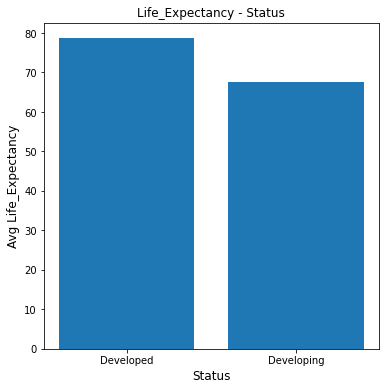

In [19]:
plt.figure(figsize=(6,6))
plt.bar(df.groupby('Status')['Status'].count().index,df.groupby('Status')['Life_expectancy'].mean())
plt.xlabel("Status",fontsize=12)
plt.ylabel("Avg Life_Expectancy",fontsize=12)
plt.title("Life_Expectancy - Status")
plt.show()

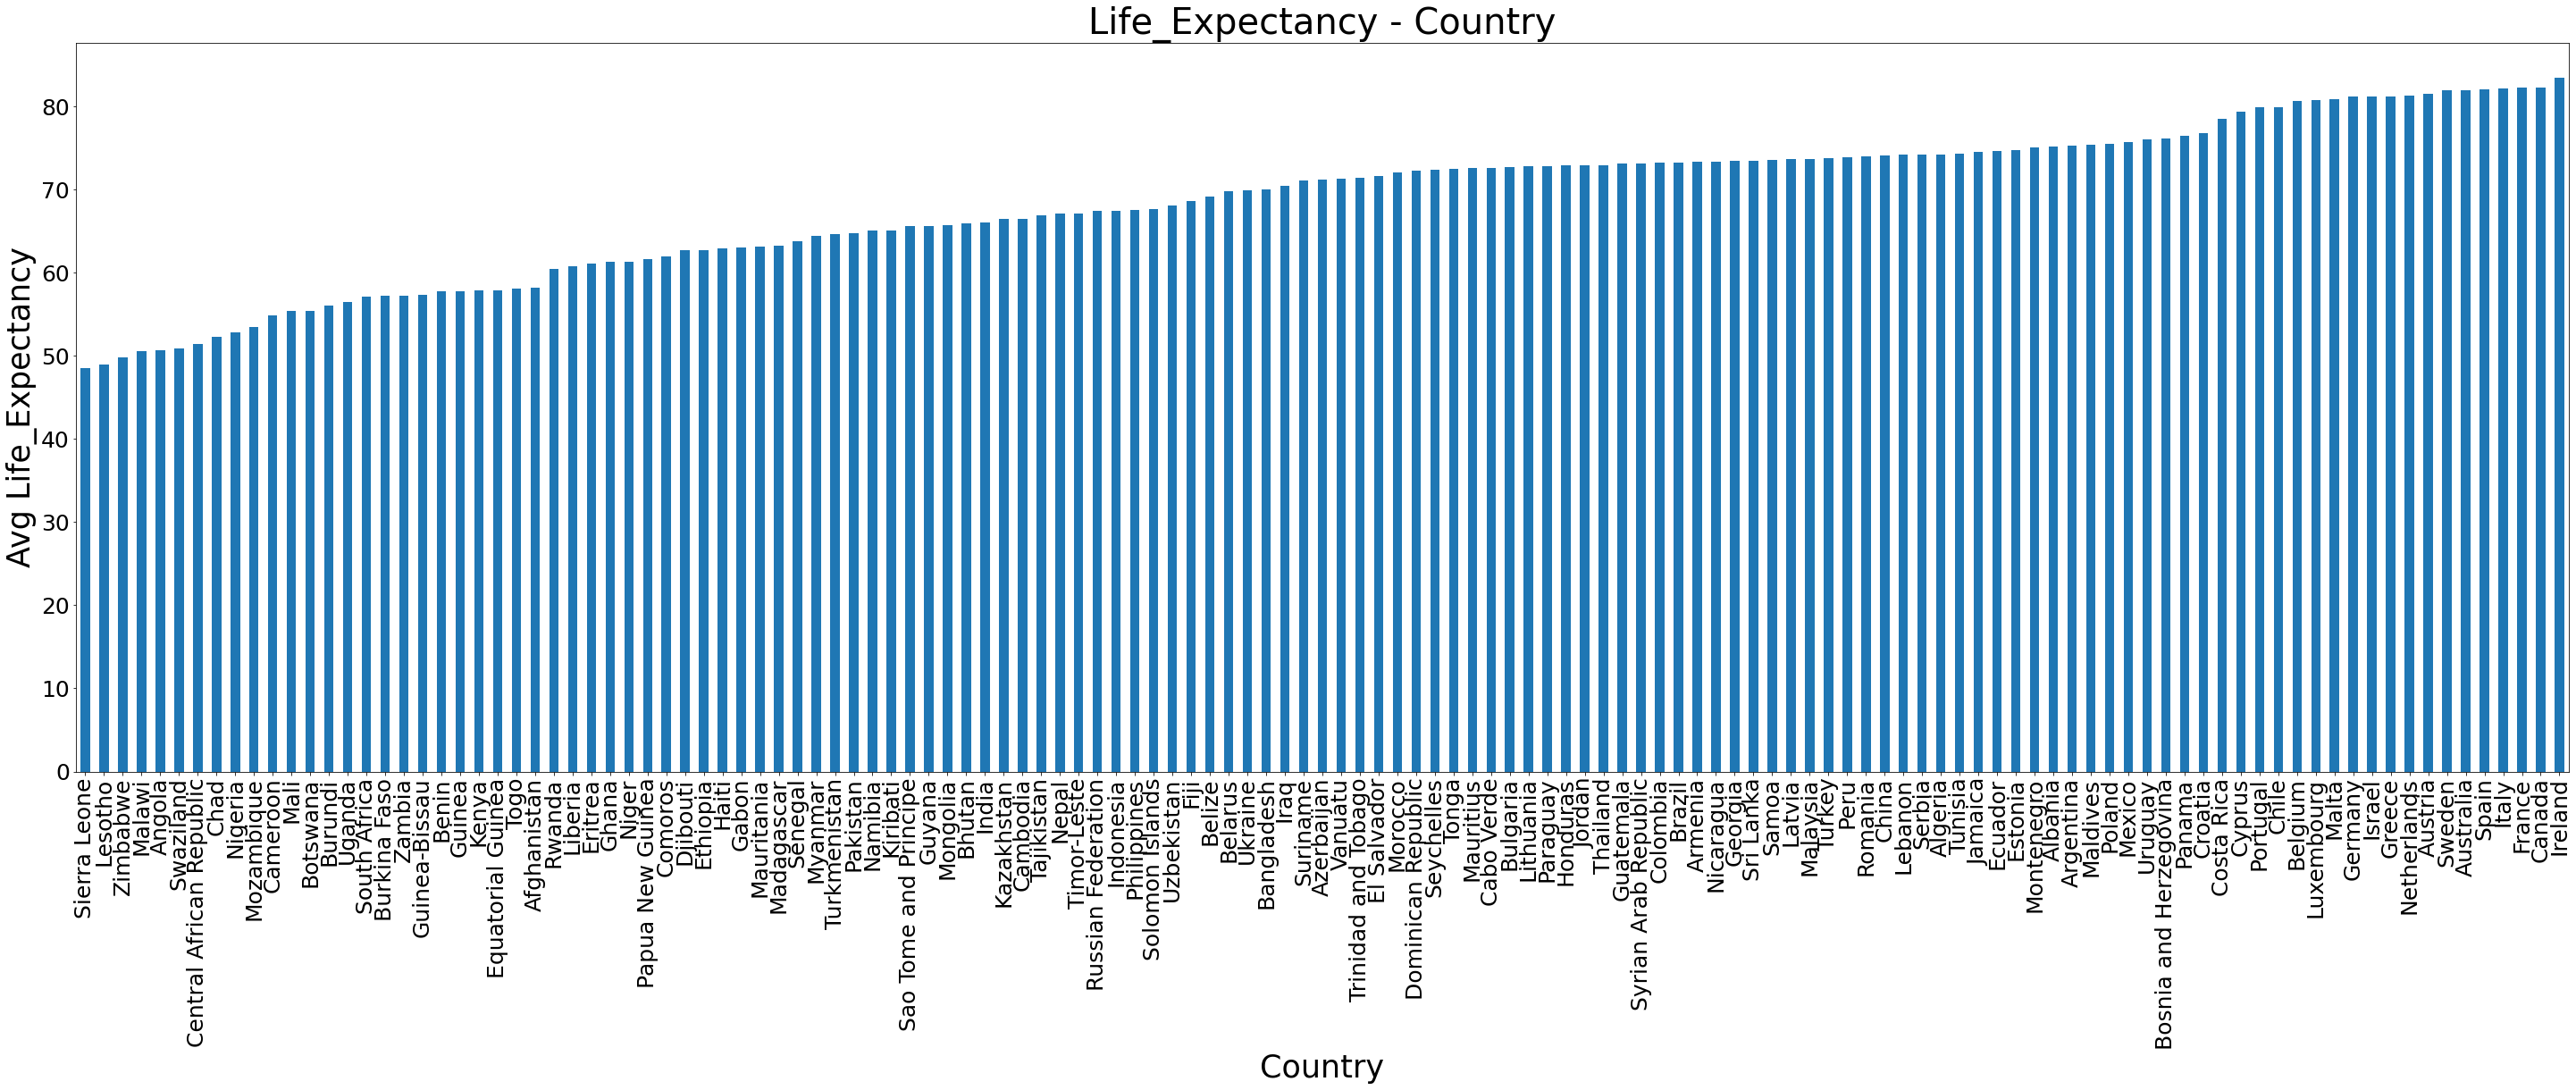

In [20]:
country_and_le = df.groupby('Country')['Life_expectancy'].mean().sort_values(ascending=True)
country_and_le.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title("Life_Expectancy - Country",fontsize=40)
plt.xlabel("Country",fontsize=35)
plt.ylabel("Avg Life_Expectancy",fontsize=35)
plt.show()

## Categorical Data Conversion

In [21]:
df = pd.get_dummies(df,columns=['Status'])

In [22]:
df.columns.values

array(['Country', 'Year', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio',
       'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness_1-19_years', 'Thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling', 'Status_Developed',
       'Status_Developing'], dtype=object)

In [23]:
df = df.drop('Country',axis=1)

## Scaling

In [24]:
scaler = StandardScaler()

df_scale = pd.DataFrame(scaler.fit_transform(df),columns=df.columns)

In [25]:
df_scale.head()

,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,...,Diphtheria,HIV/AIDS,GDP,Population,Thinness_1-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling,Status_Developed,Status_Developing
0,1.751998,-0.491887,0.857435,2.162548,-1.129602,-0.667665,-0.969648,1.844596,-0.963560,2.162098,...,-1.987314,-0.631801,-0.769637,2.023038,2.78573,2.839604,-1.063259,-0.739490,-0.414725,0.414725
1,1.507289,-1.073622,0.927300,2.162548,-1.129602,-0.661848,-1.137447,0.819193,-0.988878,2.162098,...,-1.987314,-0.631801,-0.761007,-0.699588,2.78573,2.839604,-1.082770,-0.776090,-0.414725,0.414725
2,1.262579,-1.073622,0.901100,2.162548,-1.129602,-0.662637,-1.025581,0.631656,-1.014197,2.162098,...,-1.987314,-0.631801,-0.755226,2.023038,2.78573,2.839604,-1.121792,-0.812691,-0.414725,0.414725
3,1.017869,-1.119249,0.936033,2.162548,-1.129602,-0.649768,-0.857783,1.844596,-1.039516,2.162098,...,-1.896528,-0.631801,-0.743629,-0.211609,2.78573,2.839604,-1.167317,-0.849291,-0.414725,0.414725
4,0.773159,-1.153468,0.962232,2.162548,-1.129602,-0.834028,-0.801850,1.844596,-1.059771,2.162098,...,-1.805743,-0.631801,-0.927662,-0.315647,2.78573,2.839604,-1.225850,-0.959093,-0.414725,0.414725


**Seperating Dataset into Test and Train**

In [26]:
y = df['Life_expectancy']
X = df_scale.drop(['Life_expectancy'],axis=1)

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [28]:
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(1319, 21)
(330, 21)
(1319,)
(330,)


## Applying ML Models
## Linear regression

In [29]:
lrm = LinearRegression()
lrm.fit(X_train, Y_train) #fit an OLS model

LinearRegression()

In [30]:
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)  #making predictions

In [31]:
print("R-squared of the model in training set is: {}".format(lrm.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lrm.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.8513906964102335
-----Test set statistics-----
R-squared of the model in test set is: 0.8537080599690503
Root mean squared error of the prediction is: 3.2164921203652974
Mean absolute percentage error of the prediction is: 3.4880664173630054


## Ridge Regression

In [32]:
# Using GridSearch for parameter optimization
ridgeregr = GridSearchCV(Ridge(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

ridgeregr.fit(X_train, Y_train)

ridge = ridgeregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [33]:
# Making predictions here
y_preds_train = ridge.predict(X_train)
y_preds_test_ridge = ridge.predict(X_test)

print("R-squared of the model in training set is: {}".format(ridge.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(ridge.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test_ridge)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_ridge) / Y_test)) * 100))

R-squared of the model in training set is: 0.8513745594968958
-----Test set statistics-----
R-squared of the model in test set is: 0.8534614076822552
Root mean squared error of the prediction is: 3.2192025260570727
Mean absolute percentage error of the prediction is: 3.4927820537400907


## Lasso Regression

In [34]:
# using GridSearch for parameter optimization
lassoregr = GridSearchCV(Lasso(),
                    param_grid={
                        'alpha': [0.01, 0.1, 1]
                    }, verbose=1)

lassoregr.fit(X_train, Y_train)

lasso = lassoregr.best_estimator_

Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [35]:
# We are making predictions here
y_preds_train = lasso.predict(X_train)
y_preds_test_lasso = lasso.predict(X_test)

print("R-squared of the model in training set is: {}".format(lasso.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(lasso.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test_lasso)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test_lasso) / Y_test)) * 100))

R-squared of the model in training set is: 0.8508575017964846
-----Test set statistics-----
R-squared of the model in test set is: 0.8520743397436717
Root mean squared error of the prediction is: 3.234402398464739
Mean absolute percentage error of the prediction is: 3.5123364562015307


## Decision Tree Regressor

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [37]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor()
DTregressor.fit(X_train, Y_train)

DecisionTreeRegressor()

In [38]:
y_pred_DT = DTregressor.predict(X_test)

In [39]:
print("R-squared of the model in training set is: {}".format(DTregressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(DTregressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_DT)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_DT) / Y_test)) * 100))

R-squared of the model in training set is: 1.0
-----Test set statistics-----
R-squared of the model in test set is: 0.8907935557729876
Root mean squared error of the prediction is: 2.779050415541469
Mean absolute percentage error of the prediction is: 2.4010590685369646


## Random Forest

In [40]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state= 42)

In [41]:
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
regressor.fit(X_train, Y_train)

RandomForestRegressor(random_state=0)

In [42]:
y_pred_random = regressor.predict(X_test)

In [43]:

print("R-squared of the model in training set is: {}".format(regressor.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(regressor.score(X_test, Y_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_random)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100))

R-squared of the model in training set is: 0.9938570286173826
-----Test set statistics-----
R-squared of the model in test set is: 0.9455039605687934
Root mean squared error of the prediction is: 1.963155777329097
Mean absolute percentage error of the prediction is: 1.7467282974388127


## Reference:
<p>Solution available on Kaggle and adapted to solve the Tutorial Task</p>